In [9]:
# modules for research report
from datascience import *
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# module for YouTube video
from IPython.display import YouTubeVideo

# 2016 Global Ecological Footprint

This dataset was originally published on [Kaggle.com](https://www.kaggle.com/footprintnetwork/ecological-footprint). It has been
cleaned for your convenience: all missing values have been removed, and low-quality observations and variables have been filtered
out. A brief descriptive summary of the dataset, originally posted on the dataset's Kaggle landing page, is provided below.
**You
may not copy any public analyses of this dataset. Doing so will result in an automatic F in the course.**

### Summary

> The ecological footprint measures the ecological assets that a given population requires to produce the natural resources it
 consumes (including plant-based food and fiber products, livestock and fish products, timber and other forest products, space for
 urban infrastructure) and to absorb its waste, especially carbon emissions. The footprint tracks the use of six categories of
 productive surface areas: cropland, grazing land, fishing grounds, built-up (or urban) land, forest area, and carbon demand on land.

> A nation’s biocapacity represents the productivity of its ecological assets, including cropland, grazing land, forest land, fishing
 grounds, and built-up land. These areas, especially if left unharvested, can also absorb much of the waste we generate, especially
 our carbon emissions.
 
> Both the ecological footprint and biocapacity are expressed in global hectares — globally comparable, standardized hectares with
 world average productivity.

> If a population’s ecological footprint exceeds the region’s biocapacity, that region runs an ecological deficit. Its demand for the
 goods and services that its land and seas can provide — fruits and vegetables, meat, fish, wood, cotton for clothing, and carbon dioxide
 absorption — exceeds what the region’s ecosystems can renew. A region in ecological deficit meets demand by importing, liquidating its
 own ecological assets (such as overfishing), and/or emitting carbon dioxide into the atmosphere. If a region’s biocapacity exceeds its
 ecological footprint, it has an ecological reserve.
 
> The ecological footprint measure was conceived by Mathis Wackernagel and William Rees at the University of British Columbia. Ecological
 footprint data was provided by the Global Footprint Network.
 
### Data Description

This dataset consists of two tables stored in the `data` folder:
1. `ecological-info` provides information on a countries' ecological footprint.
2. `economic-info` contains a limited amount of economic and geographical data for all countries listed in `ecological-info`.

A description of each table's variables is provided below:

`ecological-info`:
* `Country`: country name
* `Grazing Footprint`: grazing footprint in standardized hectares
* `Cropland Footprint`: cropland footprint in standardized hectares
* `Forest Footprint`: forest footprint in standardized hectares
* `Fish Footprint`: fishing footprint in standardized hectares
* `Carbon Footprint`: carbon footprint in standardized hectares
* `Total Ecological Footprint`: total ecological footprint, standardized
* `Grazing Land`: grazing land in standardized hectares
* `Cropland Land`: cropland land in standardized hectares
* `Forest Land`: forest land standardized hectares
* `Fishing Water`: fishing water in standardized hectares
* `Urban Land`: urban land in standardized hectares
* `Total Biocapacity`: total biocapacity in standardized hectares
* `Biocapacity Deficit or Reserve`: difference between total biocapacity and total ecological footprint
* `Earths Required`: The number of planet Earths required if the average human consumed as much the average citizen of this country

`econ-info`:
* `Country`: country name
* `Region`: country region
* `Continent`: continent where country is located
* `Log Population (millions)`: log transformed population in millions (2016)
* `HDI`: Human development index (HDI)
* `HDI Rating`: Binarized HDI ("High or Very High": HDI > 0.7; "Medium or Low": HDI < 0.7)
* `Log GDP per Capita`: log transformed gross domestic product per capita, in USD

### Inspiration

A variety of exploratory analyses, hypothesis tests, and predictions problems can tackled with this data. Here are a few ideas to get
you started:
1. Which regions' countries run the highet biocapacity deficits?
2. Is there a relationship beteen a country's human development index and biocapacity?
3. Is the average number of earths required by Western world significantly higher than the average required by the rest?
4. Is there a clear relationship between a countries carbon footprint and its GDP per capita?

If you'd like to read more on the topic of ecology, check out the following articles:
1. [Climate change to slow global economic growth, new study finds](https://www.cnbc.com/2019/08/20/climate-change-to-slow-global-economic-growth-new-study-finds.html) by Thomas Frank, CNBC
2. [What 1,000 CEOs really think about climate change and inequality](https://hbr.org/2019/09/what-1000-ceos-really-think-about-climate-change-and-inequality) by Andrew Winston
3. [California just got bipartisan support to extend its cap and trade program to 2030](https://www.vox.com/energy-and-environment/2017/7/15/15955756/california-climate-brown-ab398-cap-and-trade) by Ruairí Arrieta-Kenna

Don't forget to review the Final Project Guidelines *(will link when live)* for a complete list of requirements.

### Loading the Data

The tables are loaded in the code cells below. Take some time to explore them!

In [10]:
# load the economic data
economic_data = Table.read_table('data/economic-info')
economic_data

Country,Region,HDI,Continent,HDI Rating,Log Population (millions),Log GDP per Capita
Moldova,Northern/Eastern Europe,0.68,Europe,Medium or Low,1.25562,7.58631
Gabon,Africa,0.67,Africa,Medium or Low,0.48858,9.39174
Kyrgyzstan,Middle East/Central Asia,0.65,Asia,Medium or Low,1.69928,7.01784
Bangladesh,Asia-Pacific,0.56,Asia,Medium or Low,5.04149,6.75402
Romania,European Union,0.79,Europe,High or Very High,3.08007,9.12847
Afghanistan,Middle East/Central Asia,0.46,Asia,Medium or Low,3.39518,6.42107
Slovakia,European Union,0.84,Europe,High or Very High,1.69562,9.80384
Morocco,Africa,0.62,Africa,Medium or Low,3.48186,8.05498
South Africa,Africa,0.66,Africa,Medium or Low,3.95872,8.99837
Lithuania,European Union,0.83,Europe,High or Very High,1.10856,9.57316


In [11]:
# load the ecological data
ecological_data  = Table.read_table('data/ecological-info')
ecological_data

Country,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
Moldova,0.43,0.08,0.15,1.03,0.06,1.78,0.59,0.07,0.1,0.01,0.03,0.8,-0.98,1.03
Gabon,0.53,0.13,0.79,0.43,0.11,2.02,0.25,3.6,19.5,2.93,0.03,26.31,24.29,1.16
Kyrgyzstan,0.59,0.18,0.09,0.95,0.01,1.91,0.47,0.63,0.06,0.05,0.08,1.3,-0.61,1.1
Bangladesh,0.29,0,0.08,0.26,0.02,0.72,0.25,0,0,0.05,0.07,0.38,-0.35,0.42
Romania,0.72,0.05,0.33,1.46,0.03,2.71,0.87,0.11,1.14,0.08,0.12,2.32,-0.39,1.56
Afghanistan,0.3,0.2,0.08,0.18,0,0.79,0.24,0.2,0.02,0,0.04,0.5,-0.3,0.46
Slovakia,0.31,0.08,0.72,2.82,0.03,4.06,0.71,0.06,1.85,0,0.09,2.71,-1.35,2.35
Morocco,0.6,0.17,0.14,0.67,0.06,1.68,0.34,0.17,0.1,0.07,0.03,0.71,-0.96,0.97
South Africa,0.44,0.11,0.29,2.34,0.08,3.31,0.35,0.58,0.02,0.17,0.04,1.15,-2.16,1.91
Lithuania,1.89,0.21,1.28,2.15,0.16,5.83,3.03,0.11,2.09,0.3,0.15,5.67,-0.17,3.37


## Introduction

We have analyzed the 2016 Global Ecological Footprint Data for our final project. This dataset, which provides ecological information on a
random sample of 100 countries from across the world, was originally published on Kaggle.com, and was provided by The Global Footprint
Network. The dataset is divided into two tables: `ecological-info` and `economic-info`.

The `ecological-info` table provides information on each countries ecological footprint and biocapacity. A country's ecological footprint
measures the ecological resources that its population requires to maintain its consumption levels. For example, it is impacted by livestock
and fish consumption, agricultural activities, and CO2 emissions. On the other hand, a nation's biocapacity quantifies the productivity
of its ecological assets. These assets include cropland, grazing land, fishing grounds, etc. By comparing and contrasting a country's
ecological footprint and biocapacity, we can evaluate whether it is "living above its means". That is, whether a country can meet
its population's consumption requirements given its natural resources. The `ecological-info` table therefore contains variables detailing
each country's ecological footprint and biocapacity in terms of a variety of sectors, like croplands and forests. These values are 
standardized, and expressed in global hectares.  It also contains variables describing the countries' consumption levels. In particular,
the 'Earths Required' feature indicates the number of planet Earths that would be required if every human being consumed as much as the
average person from a particular country. This table also contains the 'Biocapacity Deficit or Reserve' variable, describing whether
a countries natural resource needs are met by its biocapacity.

The other table contained in this dataset, `economic-info`, provides relevant economic and geographic information on each country in
the `ecological-info` table. In particular, it provides these countries populations (in log-millions), their Human Development Index,
and their log-GDP per Capita in USD.

## Hypothesis Testing and Prediction Questions

*Please bold your hypothesis testing and prediction questions.*

By combining the information contained in both tables of this dataset, we may study the relationships between the ecological, economic,
and geographic characteristics of countries from across the world. We are interested in identifying the factors that may be
associated a country's ecological footprint.

**In particular, we are interested in determining whether the average number of Earths that required would be required to satisfy the
consumption levels among countries with 'High' and 'Very High' levels on the HDI index scale is significantly different from that of
countries with 'Medium' or 'Low' levels on the HDI scale.** For this hypothesis testing question, the null hypothesis is that there is no
relationship between these two variables. Our alternative hypothesis is that countries with higher HDI scores also possess populations
that over-consume the planet's natural resources.

**Relatedly, we wish to determine whether a country's 'Log GDP per Capita' can be used to predict its 'Biocapacity Deficit or Reserve'.**
We employ a linear regression model to accomplish this task, and determine whether there is a linear association between these two
variables.

## Exploratory Data Analysis

Next, we explore the 2016 Ecological Footprint Data for interesting patterns related to our hypothesis testing and prediction questions.

**Table Requiring a Join Operation:**

First, we join the data in `ecological-info` and `economic-info` to create the `full_data` table. We then use this new table to
investigate whether our instinct regarding the association between a country's HDI score and the number of Earths required if
all humans consumed at the rate of its average citizen seems correct. Indeed, this is the case among our randomly sampled countries.
We will determine whether this difference is significant in the *Hypothesis Testing* Section.

In [12]:
# join the tables
full_data = ecological_data.join('Country', economic_data)

# create the desired table
mean_earths_required = full_data.select('HDI Rating', 'Earths Required').group('HDI Rating', np.average)
mean_earths_required.relabel('Earths Required average', 'Average Earths Required')

HDI Rating,Average Earths Required
High or Very High,2.81833
Medium or Low,0.906522


**Aggregated Data Table:**

Because we will perform an A/B test to answer our hypothesis question, we must verify that there are a similar number of countries with low
and high HDI ratings. Otherwise, the results of our testing procedure might not be valid. Thus, we generate a pivot table of summarizing the
countries HDI Ratings and geographic location. Although not directly related to our hypothesis testing question, the inclusion of geographic
information in this exploratory analysis might provide additional insight into potential biases when it comes time to interpret the
results of our test.

The resulting table's values indicate that there a roughly equal number of countries in each 'HDI Rating' category. However, these countries
are not evenly split within each continent.

In [13]:
economic_data.pivot('HDI Rating', 'Continent')

Continent,High or Very High,Medium or Low
Africa,2,28
America,14,2
Asia,18,15
Europe,20,1


**Quantitative Plot:** 

Next, we explore the data related to our prediction problem. We therefore create a scatter plot to illustrate the relationship between
the countries' average wealth and its trade-off between ecological production and consumption. Based on this visualization, there doesn't
appear to be a strong linear association between our posited explanatory variable, 'Log GDP per Capita', and the predictor,
'Biocapacity Deficit or Reserve'. Our linear model is unlikely to perform well.

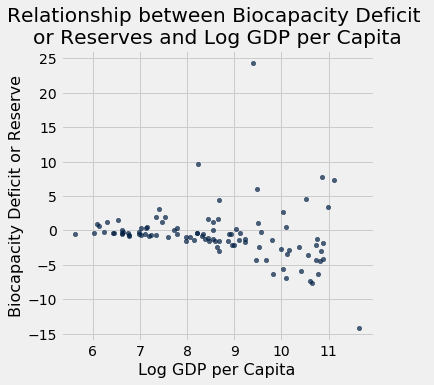

In [14]:
full_data.scatter('Log GDP per Capita', 'Biocapacity Deficit or Reserve')
plots.title('Relationship between Biocapacity Deficit \nor Reserves and Log GDP per Capita');

**Qualitative Plot:**

Before beginning our statistical analyses, we should make sure that the randomly sampled countries are an accurate representation
of the world's countries. We verify this by counting the number of countries from each continent. Because this is random sample, we
expect the proportions of countries from each continent in our sample to be similar to the true proportion of countries per continent.
Based on the generated bar plot, this doesn't appear to be the case: there are no countries from the Australian continent in our
sample. We will take this issue into account when interpreting the results of our hypothesis testing and prediction
procedures.

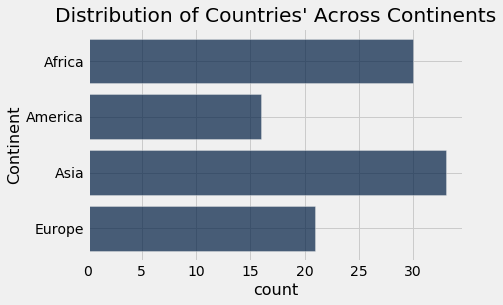

In [15]:
economic_data.group('Continent').barh('Continent')
plots.title("Distribution of Countries' Across Continents");

## Hypothesis Testing

Next, we perform a hypothesis testing procedure to determine whether there is an association between a country's HDI classification
and the number of Earths required to satisfy the natural resource needs of the world population if everyone consumed as much as
the country's average citizen. The null hypothesis is that there is no such association, and our alternative hypothesis is
that countries with an HDI classification of 'High or Very High' possess a population that consumes more natural resources, on
average, than countries with a lower HDI classification.

This testing procedure corresponds to an A/B test. Our test statistic will be the difference in average Earths required between
countries with 'High or Very High' and 'Medium or Low' HDI ratings. Larger values of the test statistic will favor the alternative
hypothesis. We employ a significance cutoff of 5%.

*Do not copy code from demo notebooks or homeworks! You may split portions of your code into distinct cells.*

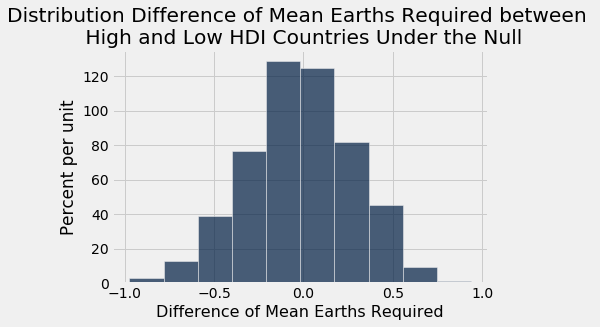

In [16]:
# set the random seed so that results are reproducible
random.seed(1231)

# the following function computes the test statistic for a given sample
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(0) - means.item(1)

# we use the above function to compute the observed test statistic
observed_test_stat = difference_of_means(full_data, 'Earths Required', 'HDI Rating')


# we define a function to permute the HDI rating labels
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels
    )
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')


# we now perform the A/B testing procedure by simulating the test statistic's distribution under the null
repititons = 1000
differences  = make_array()

for i in np.arange(repititons):
    new_difference = one_simulated_difference(full_data, 'Earths Required', 'HDI Rating')
    differences = np.append(differences, new_difference)

# finally, we visualize our results, and then compute the p-value
Table().with_column('Difference of Mean Earths Required', differences).hist()
plots.title('Distribution Difference of Mean Earths Required between \n High and Low HDI Countries Under the Null');

In [17]:
p_value = np.count_nonzero(observed_test_stat <= differences) / repititons
p_value

0.0

Given that our observed test statistic is equal to about 1.9, we have ample evidence that the countries ranked higher on the
HDI scale tend to have populations that consume more natural resources, on average, than countries with lower HDI values.
That is, our data is inconsistent with the null hypothesis. However, since there aren't any countries from the Australian
continent, it is not clear whether these results hold for all the world's countries.

## Prediction

Next, we'll fit a linear regression to our ecological footprint data to determine if countries' 'Biocapacity Deficit or
Reserve' can be accurately predicted based on their 'Log GDP per Capita'. First, we fit the linear regression model
using the methods taught in class, and then we evaluate whether our model accurately reflects reality by studying our
prediction's residuals. Given the results of our exploratory data analysis, we do not expect the linear regression to perform
well: the two variables under study aren't highly correlated.

In [63]:
# define the functions needed to fit the linear regression
def standard_units(array_of_num):
    """Converts a numeric array to standard units."""
    standardized_array = (array_of_num - np.mean(array_of_num)) / np.std(array_of_num)
    return standardized_array

def correlation(tbl, var1, var2):
    """Computes the correlation coefficient of two variables"""
    r = np.mean(standard_units(tbl.column(var1)) * standard_units(tbl.column(var2)))
    return r

def slope(tbl, x, y):
    """Compute the slope of the regression line. x is the independent variable, y the depenent variable."""
    r = correlation(tbl, x, y)
    m = r * np.std(tbl.column(y)) / np.std(tbl.column(x))
    return m

def intercept(tbl, x, y):
    """Compute the intercept of the regression line. x is the independent variable, y the depenent variable."""
    b = np.mean(tbl.column(y)) - slope(tbl, x, y) * np.mean(tbl.column(x))
    return b

def linear_fit(tbl, x, y):
    m = slope(tbl, x, y)
    b = intercept(tbl, x, y)
    return m * tbl.column(x) + b

correlation(full_data, 'Log GDP per Capita', 'Biocapacity Deficit or Reserve')

-0.2225512467238188

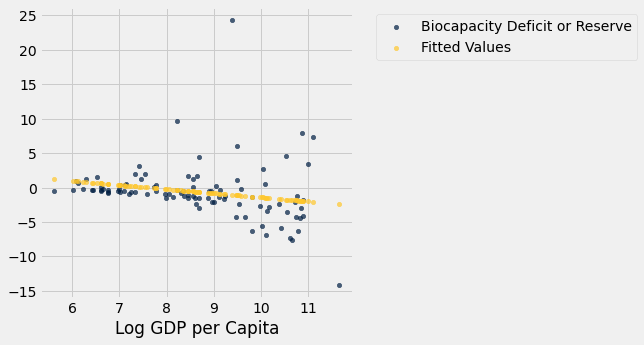

In [59]:
# fit the linear regression, store results in table
linear_regression_results = Table().with_columns(
    'Log GDP per Capita', full_data.column('Log GDP per Capita'),
    'Biocapacity Deficit or Reserve', full_data.column('Biocapacity Deficit or Reserve'),
    'Fitted Values', linear_fit(full_data, 'Log GDP per Capita', 'Biocapacity Deficit or Reserve')
)

# plot the fitted results agains the true Biocapacity Deficit and Rerserves
linear_regression_results.scatter('Log GDP per Capita')

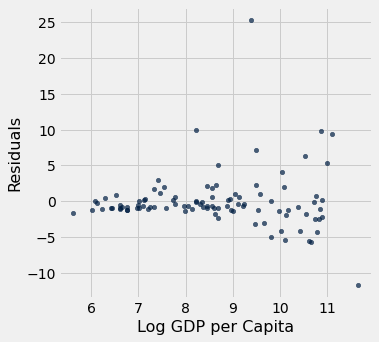

In [62]:
# compute the residuals of our linear regression model
linear_regression_results = linear_regression_results.with_column(
    'Residuals', linear_regression_results.column(1) - linear_regression_results.column(2)
)
linear_regression_results.scatter('Log GDP per Capita', 'Residuals')

As we suspected, the linear relationship between Log GDP per Capita and Biocapacity Deficit or Reserve is very weak, and so
our linear model performs quite poorly. These variables are very weakly, negatively correlated (r = -0.223). Further, the
scatter plots of the fitted values and of the residuals illustrate the non-linear relationship between these two variables.
As the log GDP per capita of the countries in our sample increase, the values of Biocapacity Deficit or Reserve begin to fluctuate
erratically about zero. A more complex model is needed to accurately explain the variation in a countries Biocapacity Reserve
or Deficit.

## Conclusion

In this research report, we attempted to identify the ecological and economic factors associated with a country's ecological
footprint. Using an A/B testing procedure, we showed that countries' HDI measures are associated with their populations'
natural resource consumption levels. On average, the citizens of country's who have a 'High or Very High' rating on the HDI scale
consume more than citizens from countries with lower HDI values. We also attempted to explain the variation of a country's
biocapacity deficity or reserve through a linear relationship with its GDP. However, we found that this model to be overly
simplistic; these two variables do not have a linear relationship. A more complex model is required to explain the variation in
a nation's biocapacity deficit or reserve.

Although we were provided a clean dataset, we noticed during our exploratory data analysis that countries from the Australian
continent were excluded from the sample. If this were not due to chance alone, than their lack of representation in our data
could severely bias our findings. To remedy this issue, we suggest collecting a new dataset in which these countries are
included, and re-running the analyses in this notebook

## Presentation

*In this section, you'll need to provide a link to your video presentation. If you've uploaded your presentation to YouTube,
you can include the URL in the code below. We've provided an example to show you how to do this.*

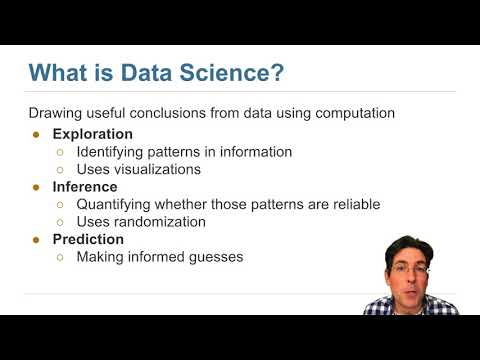

In [8]:
# Full Link: https://www.youtube.com/watch?v=BKgdDLrSC5s&feature=emb_logo
# Plug in string between "v=" and ""&feature":
YouTubeVideo('BKgdDLrSC5s')